# <center> Lab 01: Linear Regression, Multiple Regression and Regularised Regression <br> <small>Réda DEHAK<br> 6 january 2020</small> </center>

The goal of this lab is :
    - Implement a linear regression
    - Try different version of the gradient descent algorithm
    - Fit generalised linear models with ridge or Lasso regularisations
    
We will use a data file that contain different measurements of height (variable y) of an individual sample according to the age (variable x).

## Import Data

Using matplotlib backend: Qt5Agg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
shape(x) :  (50,)
shape(y) :  (50,)


Text(0, 0.5, 'Height')

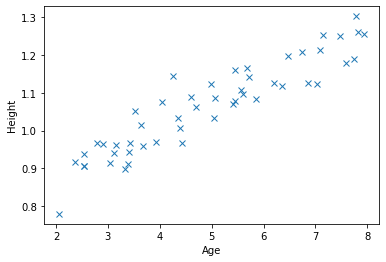

In [3]:
%pylab
%matplotlib inline
import numpy as np
import pickle
fin = open('data.pkl', 'rb')
x = pickle.load(fin)
y = pickle.load(fin)
fin.close()
print("shape(x) : ", x.shape)
print("shape(y) : ", y.shape)
import matplotlib.pyplot as plt
plt.plot(x, y, 'x')
plt.xlabel('Age')
plt.ylabel('Height')

## Part 1: Linear Regression

We will implement a linear regression for this problem, you know that the linear 
regression assumes that the observed variable $y$ is a linear combination of the 
vector of observation $x$

$$f(x) = x^TA =\sum_{d=1}^D a_{[d]} x_{[d]}$$
with $x_{[D]} = 1$

The linear regression consists in finding the parameters $A$ which minimizes the 
quadratic error:
$$E(A) = \sum_{i=1}^{N}\left(f(x_i) - y_i\right)^2$$

we will solve this problem using two different methods:

**1. Exact solution:**

The vector $A$ which minimize $E(A)$ is defined as follow:
$$A = (XX^T)^{-1}X Y$$

where 
$$X=\left[\begin{matrix}
x_1 & x_2 & ... & x_N\\
1   &  1  & ... &  1
\end{matrix}\right]$$

$$Y=\left[\begin{matrix}
y_1\\
y_2\\
...\\
y_N
\end{matrix}\right]$$

**a-** Compute the vector $A$ wich minimize $E(A)$?

In [4]:
print(x)

[2.0658746 2.3684087 2.5399929 2.5420804 2.549079  2.7866882 2.9116825
 3.035627  3.1146696 3.1582389 3.3275944 3.3793165 3.4122006 3.4215823
 3.5315732 3.6393002 3.6732537 3.9256462 4.0498646 4.2483348 4.3440052
 4.3826531 4.4230602 4.6102443 4.6881183 4.9777333 5.0359967 5.0684536
 5.4161491 5.4395623 5.4563207 5.5698458 5.6015729 5.6877617 5.7215602
 5.8538914 6.1978026 6.3510941 6.4797033 6.7383791 6.8637686 7.0223387
 7.0782373 7.1514232 7.4664023 7.5973874 7.7440717 7.7729662 7.8264514
 7.9306356]


In [5]:
X = np.stack((x,np.ones(len(x))),axis=0)
Y = y.reshape((-1,1))

#A=np.dot(np.linalg.inv(np.dot(X,np.transpose(X))),np.dot(X,Y))
A= np.linalg.inv(X @ X.T) @ X @ Y

## ( @ is a product instead of  dot)       
print(A)

[[0.06388117]
 [0.75016254]]


Text(0, 0.5, 'Height')

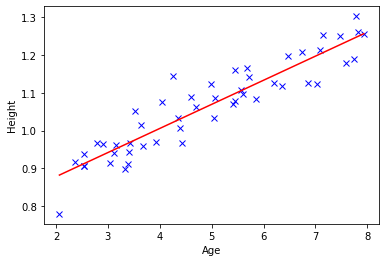

In [6]:
def predict(A, x):
    if isscalar(x):
        X=np.vstack((x,1))
        return (X.T @ A)[0][0]
    X=np.stack((x,np.ones(len(x))),axis=0)
    return X.T @ A # ax +b


plt.plot(x, y, 'x', c='blue')
pred = predict(A, x)
plt.plot(x, pred, c='red')
plt.xlabel('Age')
plt.ylabel('Height')


**b-** Plot in the same figure the training data and the straight 
line corresponding to the obtained $A$?

**c-** Predict the height of a person of age 3.5 and that of age 7? 

In [7]:
print("height(3.5) = ", predict(A,3.5))
print("height(7) = ", predict(A,7))
print("height(7) = ", predict(A,np.array([3.5])))

height(3.5) =  0.9737466173916574
height(7) =  1.1973306977820757
height(7) =  [[0.97374662]]


**2. Gradient Descent :**
In this part, we will use the gradient descent algorithm (see convex optimization course) to find the best regression parameters. We will use the batch learning. 

**a-** Give the recurrence formula for $A$ of the algorithm?

$$ A_n = A_{n-1} - \frac{2\eta}{N} \left(XX^T A_{n-1} - XY\right) $$

$$
E=\frac{1}{N}\left(A^{T} X X^{T} A-2 A^{T} X Y +Y^{T}Y\right)\text { ---> Cost function }
$$


**b-** Implement a gradient descent with a learning rate $\eta = 0.035$ 
and starting from the origin of the space $A = 0$? Wait until the convergence of the algorithm? (print at each iteration, the number of iteration, the Error and the norm of the gradient)

intital_cost:  [[1.14746498]]
Iter:  0  Error:  [[0.56606457]]  [Old-New](Cost): [[0.58140041]]  t0:  [0.32573286]  t1:  [0.06388116]
Iter:  50  Error:  [[0.03099286]]  [Old-New](Cost): [[0.00036634]]  t0:  [0.1583351]  t1:  [0.23100675]
Iter:  100  Error:  [[0.01747157]]  [Old-New](Cost): [[0.00019565]]  t0:  [0.13290685]  t1:  [0.37077036]
Iter:  150  Error:  [[0.01025053]]  [Old-New](Cost): [[0.00010448]]  t0:  [0.11432422]  t1:  [0.47290775]
Iter:  200  Error:  [[0.00639414]]  [Old-New](Cost): [[5.57996916e-05]]  t0:  [0.10074429]  t1:  [0.54754841]
Iter:  250  Error:  [[0.00433464]]  [Old-New](Cost): [[2.97997859e-05]]  t0:  [0.09082025]  t1:  [0.60209482]
Iter:  300  Error:  [[0.00323476]]  [Old-New](Cost): [[1.59145547e-05]]  t0:  [0.08356789]  t1:  [0.64195661]
Iter:  350  Error:  [[0.00264737]]  [Old-New](Cost): [[8.49915669e-06]]  t0:  [0.07826796]  t1:  [0.67108708]
Iter:  400  Error:  [[0.00233368]]  [Old-New](Cost): [[4.53896864e-06]]  t0:  [0.07439485]  t1:  [0.69237524]


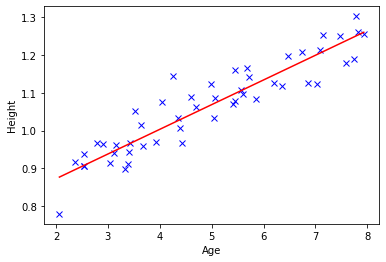

In [8]:
# E= 1/N * ( y - y_predict)^2
# E =1/N * (( A^T@X - y_p)^2
# E =1/N * (A^T@X)^2 - 2(A^T@X)@y_p +(y_p)^2
# E =1/N *  (A^T @ X @ X^T @ A) - 2 * A^T@X@Y +Y^T@Y
%matplotlib inline
def Gradient_Descent(learning_rate, 
                    X, 
                    Y, 
                    eps=0.0001, 
                    max_iter=1000, 
                    steps=10):
    
    A = np.zeros((2, 1))
    N = X.shape[1]
    theta0_hist=[A[0]]
    theta1_hist=[A[1]]
    
    intital_cost = (1/N)*(Y.T@Y - 2*A.T@X@Y + A.T@X@X.T@A)
    print("intital_cost: ",intital_cost)
    
    iter = 1
    for iter in range(max_iter):
        
        # calculate new Theta0, theta 1 (slope,intercept)
        delta = 2*eta/N*(X@X.T@A - X@Y)
        A= A - 2*eta/N*(X@X.T@A - X@Y)
        
        theta0_hist.append(A[0])
        theta1_hist.append(A[1])
        #calculate new cost
        new_cost=(1/N)*(Y.T@Y - 2*A.T@X@Y + A.T@X@X.T@A)

        if (iter % steps ==0): 
            print("Iter: ", iter, 
                     " Error: ",new_cost, 
                     " [Old-New](Cost):",abs(intital_cost-new_cost), 
                     " t0: ", A[0], 
                     " t1: ",A[1])

        if abs(intital_cost-new_cost) <tol:
            print('Converged, iterations: ', iter)
            print(A)
            break

        intital_cost=new_cost

    if iter == max_iter:
        print('Max interactions exceeded!')
        
    return A,theta0_hist,theta1_hist
N = X.shape[1]
eta = 0.03
tol = 10**-7
steps=50
max_iter=1000
A,theta0_hist,theta1_hist=  Gradient_Descent(eta,X,Y,tol,max_iter,steps)
plt.plot(x, y, 'x', c='blue')
pred = predict(A, x)
plt.plot(x, pred, c='red')
plt.xlabel('Age')
plt.ylabel('Height')  
plt.show()

**c-** Did you obtain the same result as question 1?

In [9]:
A1= np.linalg.inv(X @ X.T) @ X @ Y
print("A using Inverse :", A1)
print("A using Gradient Descent :",A)

print( "Slope error ", A1[0]-A[0])
print( "Intercept error ", A1[1]-A[1])

print("\n--->We almost have the same results with minimal margin of error")

A using Inverse : [[0.06388117]
 [0.75016254]]
A using Gradient Descent : [[0.06543312]
 [0.74163241]]
Slope error  [-0.00155195]
Intercept error  [0.00853013]

--->We almost have the same results with minimal margin of error


**d-** To understand the gradient descent, we will display in 3D the curve of the error:

In [10]:
import numpy as np
error = np.zeros((100,100))
a0 = np.linspace(-.2, .45, 100)
a1 = np.linspace(-.1, 1, 100)

for i in range(a0.shape[0]):
    for j in range(a1.shape[0]):
        A = np.array([[a0[i]],[a1[j]]])
        error[i, j] = (1/N)*(Y.T@Y - 2*A.T@X@Y + A.T@X@X.T@A)


In [11]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import interactive
A0, A1 = np.meshgrid(a0, a1)
fig = plt.figure(figsize=(8, 6), dpi=120)
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A0, A1, error.T, cmap=cm.jet, rstride=1, cstride=1)
ax.set_xlabel('A0')
ax.set_ylabel('A1')
interactive(True)

You can see different views of the plot using the mouse in the interactive mode

**e-** What is the link between this figure and different values of $A$ founded during the iterations of the gradient descent algorithm? Plot the path obtained using the different values of $A$ in the same figure?

In [12]:
#calulate Error
%matplotlib qt
error1 = np.zeros((len(theta0_hist)))
for i in range(len(theta0_hist)):
        A = np.array([theta0_hist[i],theta1_hist[i]])
        error1[i] = (1/N)*(Y.T@Y - 2*A.T@X@Y + A.T@X@X.T@A)
theta0_hist=np.array(theta0_hist).reshape((-1,))
theta1_hist=np.array(theta1_hist).reshape((-1,))

A0, A1 = np.meshgrid(a0, a1)
B0,B1=theta0_hist,theta1_hist
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A0, A1, error.T , cmap=cm.jet, rstride=1, cstride=1)
ax.plot(B0,B1,error1,color="red",linewidth=3)
ax.set_xlabel('A0')
ax.set_ylabel('A1')
interactive(True)

**f-** Conclude?

## So basicaly we can see how using the Directional Derviative of our Cost Function (Gradient Descent ) can show us how can we descent to the lowest point of our convex function ( Minimum ) where we can see the tangent where Cost function is almost ~ Zero

**g-** How can we improve the speed of convergence? implement this new method and compare the result with the previous decent algorithm? Plot the path obtained using the different values of A in the same figure for the two algorithms?

intital_cost:  [[1.14746498]]
Iter:  0  Error:  [[1.14380234]]  [Old-New](Cost): [[0.00366264]]  t0:  [0.00010221]  t1:  [0.00120026]
Iter:  50  Error:  [[0.97485128]]  [Old-New](Cost): [[0.00312069]]  t0:  [0.00500954]  t1:  [0.05882751]
Iter:  100  Error:  [[0.83089913]]  [Old-New](Cost): [[0.00265894]]  t0:  [0.00953929]  t1:  [0.11202076]
Iter:  150  Error:  [[0.70824692]]  [Old-New](Cost): [[0.00226551]]  t0:  [0.0137205]  t1:  [0.16112117]
Iter:  200  Error:  [[0.60374299]]  [Old-New](Cost): [[0.00193029]]  t0:  [0.01758001]  t1:  [0.20644366]
Iter:  250  Error:  [[0.51470202]]  [Old-New](Cost): [[0.00164468]]  t0:  [0.02114255]  t1:  [0.24827891]
Iter:  300  Error:  [[0.43883604]]  [Old-New](Cost): [[0.00140132]]  t0:  [0.02443098]  t1:  [0.28689524]
Iter:  350  Error:  [[0.3741956]]  [Old-New](Cost): [[0.00119397]]  t0:  [0.02746638]  t1:  [0.32254032]
Iter:  400  Error:  [[0.3191197]]  [Old-New](Cost): [[0.00101731]]  t0:  [0.03026824]  t1:  [0.35544277]
Iter:  450  Error:  [[

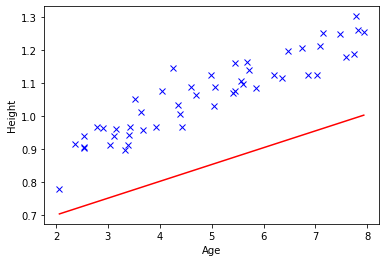

A using Inverse : [[0.06388117]
 [0.75016254]]
A using Gradient Descent : [[0.0510003 ]
 [0.59890128]]
Slope error  [0.01288087]
Intercept error  [0.15126126]

--->We almost have the same results with minimal margin of error


In [13]:
## newtowns method
%matplotlib inline

# if you can not discover the learning rare use Newtons even if it costful

def Gradient_Descent_Newtowns(learning_rate, 
                    X, 
                    Y, 
                    eps=0.0001, 
                    max_iter=1000, 
                    steps=10):
    A = np.zeros((2, 1))
    N = X.shape[1]
    theta0_hist=[A[0]]
    theta1_hist=[A[1]]
    
    intital_cost = (1/N)*(Y.T@Y - 2*A.T@X@Y + A.T@X@X.T@A)
    
    Hess = np.linalg.inv((N/2)*X @ X.T)
    
    print("intital_cost: ",intital_cost)
    iter = 1
    for iter in range(max_iter):
        # calculate new Theta0, theta 1 (slope,intercept)

        A= A - Hess@((2)/N*(X@X.T@A - X@Y))

        #calculate new cost
        new_cost=(1/N)*(Y.T@Y - 2*A.T@X@Y + A.T@X@X.T@A)
        if (iter % steps ==0): 
            theta0_hist.append(A[0])
            theta1_hist.append(A[1])
            print("Iter: ", iter, 
                     " Error: ",new_cost, 
                     " [Old-New](Cost):",abs(intital_cost-new_cost), 
                     " t0: ", A[0], 
                     " t1: ",A[1])

        if intital_cost-new_cost <=tol:
            print('Converged, iterations: ', iter)
            print(A)
            break

        intital_cost=new_cost

    if iter == max_iter:
        print('Max interactions exceeded!')

    return A,theta0_hist,theta1_hist

N = X.shape[1]
eta = 15
tol = 10**-7
steps=50
max_iter=1000
A,theta0_hist,theta1_hist=  Gradient_Descent_Newtowns(eta,X,Y,tol,max_iter,steps)
plt.plot(x, y, 'x', c='blue')
pred = predict(A, x)
plt.plot(x, pred, c='red')
plt.xlabel('Age')
plt.ylabel('Height')  
plt.show()


A1= np.linalg.inv(X @ X.T) @ X @ Y
print("A using Inverse :", A1)
print("A using Gradient Descent :",A)

print( "Slope error ", A1[0]-A[0])
print( "Intercept error ", A1[1]-A[1])

print("\n--->We almost have the same results with minimal margin of error")

In [14]:
%matplotlib qt
A0, A1 = np.meshgrid(a0, a1)

error2 = np.zeros((len(theta0_hist)))
for i in range(len(theta0_hist)):
        A = np.array([theta0_hist[i],theta1_hist[i]])
        error2[i] = (1/N)*(Y.T@Y - 2*A.T@X@Y + A.T@X@X.T@A)
theta0_hist=np.array(theta0_hist).reshape((-1,))
theta1_hist=np.array(theta1_hist).reshape((-1,))
C0,C1=theta0_hist,theta1_hist

fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A0, A1, error.T , cmap=cm.jet,rstride=1, cstride=1, alpha=0.2)
ax.plot(B0,B1,error1,color="red",linewidth=4)
ax.plot(C0,C1,error2,color="Green",linewidth=4)
ax.set_xlabel('A0')
ax.set_ylabel('A1')
interactive(True)

**h-** To run a linear Regression you can also use the sklearn library.

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept = False).fit(X.T, Y)
print("A = ", reg.coef_)
print("height(3.5) = ", reg.predict(np.array([[3.5, 1]])))
print("height(7) = ", reg.predict(np.array([[7, 1]])))
print("Score = ", reg.score(X.T, y.reshape((50,1))))

A =  [[0.06388117 0.75016254]]
height(3.5) =  [[0.97374662]]
height(7) =  [[1.1973307]]
Score =  0.8580632237208232


## Part 2: Regularised Regression 
### Import Data

The following dataset is from Hastie, Tibshirani and Friedman (2009), from a study by Stamey et al. (1989) of prostate cancer, measuring the correlation between the level of a prostate-specific antigen and some covariates. The covariates are
- lcavol : log-cancer volume
-  lweight : log-prostate weight
-  age : age of patient
-  lbhp : log-amount of benign hyperplasia
-  svi : seminal vesicle invasion
-  lcp : log-capsular penetration
-  gleason : Gleason Score,
-  lpsa is the response variable, log-psa.

In [14]:
%pylab
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

Using matplotlib backend: Qt5Agg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [15]:
fin = open('data2.pkl', 'rb')
xtrain = pickle.load(fin)
ytrain = pickle.load(fin)
Xtest = pickle.load(fin)
Ytest = pickle.load(fin)
fin.close()

print('Train data : ', xtrain.shape, ' ', ytrain.shape)
print('Test data : ', Xtest.shape, ' ', Ytest.shape)

Train data :  (7, 60)   (60,)
Test data :  (7, 37)   (37,)


### Linear Regression

Using the program of Part 1, compute the linear regression weight $w$

$$y = g(x) = W^T x =\sum_{d=0}^7 w_d x_d$$
with $x_0 = 1$

The linear regression consists in finding the parameters $W$ which minimizes the 
quadratic error:
$$E(W) = \frac{1}{60}\sum_{i=1}^{60}\left(g(x_i) - y_i\right)^2$$

The vector $W$ which minimize $E(W)$ is defined as follow:
$$W = (X X^T)^{-1}X Y$$

Compute the vector $W$ wich minimize $E(W)$ :
- Compute $w$ using the exact solution
x- Compute the error on test data

In [16]:
N= len(ytrain)
X = xtrain
Z=np.ones((1,len(ytrain)))
X= np.vstack((Z,X))
Y = ytrain
Y.reshape((-1,))


W= np.linalg.inv(X @ X.T) @ X @ Y

print("W is " ,W)

N1=len(Ytest)

X1 = Xtest
Z1=np.ones((1,len(Ytest)))
X1= np.vstack((Z1,X1))
Y1 = Ytest
Y1.reshape((-1,))

E = (1/N1)*(Y1.T@Y1 - 2*W.T@X1@Y1 + W.T@X1@X1.T@W)
print("\nErorr on test data is E",E)


W is  [-1.37427705  0.40461954  0.52246673 -0.02499738  0.16200821 -0.74830121
 -0.08828183  0.38558413]

Erorr on test data is E 2.864149965701483


- Check that you obtain the same $W$ with sklean.linear_model.LinearRegression?

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept = False).fit(X.T, Y)
print("A = ", reg.coef_)


A =  [-1.37427705  0.40461954  0.52246673 -0.02499738  0.16200821 -0.74830121
 -0.08828183  0.38558413]


## show Regression of each column

intital_cost:  [[3.92214088]]
Iter:  0  Error:  [[3.91442769]]  [Old-New](Cost): [[0.00771319]]  t0:  [0.00048725]  t1:  [0.00161264]


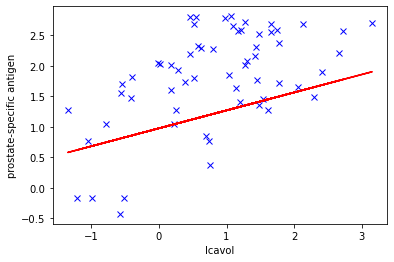

intital_cost:  [[3.92214088]]
Iter:  0  Error:  [[3.91456373]]  [Old-New](Cost): [[0.00757714]]  t0:  [0.0010196]  t1:  [-0.00157014]


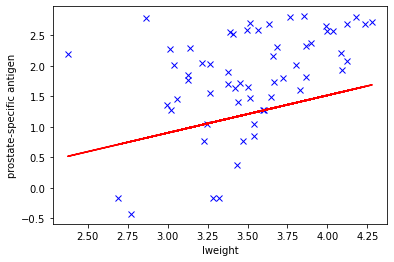

intital_cost:  [[3.92214088]]
Iter:  0  Error:  [[3.91483535]]  [Old-New](Cost): [[0.00730553]]  t0:  [1.78718918e-05]  t1:  [0.00089355]


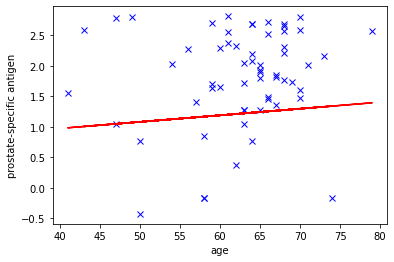

intital_cost:  [[3.92214088]]
Iter:  0  Error:  [[3.91463743]]  [Old-New](Cost): [[0.00750345]]  t0:  [0.000252]  t1:  [0.00200643]


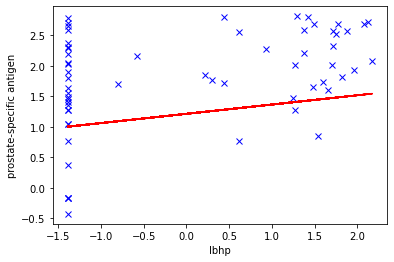

intital_cost:  [[3.92214088]]
Iter:  0  Error:  [[3.91484076]]  [Old-New](Cost): [[0.00730012]]  t0:  [0.00066841]  t1:  [0.00198856]


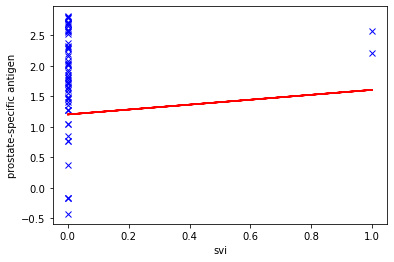

intital_cost:  [[3.92214088]]
Iter:  0  Error:  [[3.91476422]]  [Old-New](Cost): [[0.00737666]]  t0:  [0.00022936]  t1:  [0.00217922]


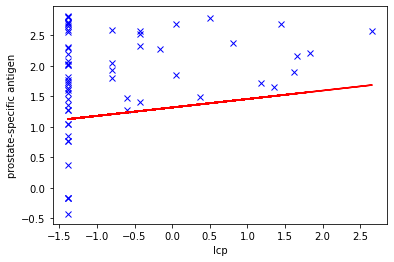

intital_cost:  [[3.92214088]]
Iter:  0  Error:  [[3.91465818]]  [Old-New](Cost): [[0.0074827]]  t0:  [0.00049321]  t1:  [-0.00123613]


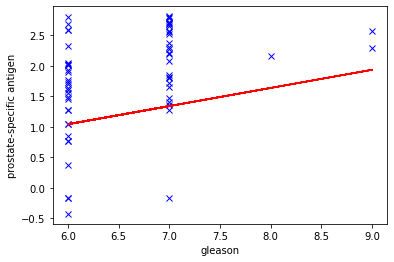

In [18]:
list_symp=list(["lcavol",
               "lweight",
               "age",
               "lbhp",
               "svi",
               "lcp",
               "gleason"])
fig = plt.figure()
for i in range(len(list_symp)):
    
    
    XX=xtrain[i,:]
    XX = np.stack((XX,np.ones(len(XX))),axis=0)
    YY = ytrain.reshape((-1,1))

    eta = 15
    tol = 10**-7
    steps=50
    max_iter=1000

    A,theta0_hist,theta1_hist=  Gradient_Descent_Newtowns(eta,XX,YY,tol,max_iter,10**10)
    plt.plot(xtrain[i,:], ytrain, 'x', c='blue')
    pred = predict(A, xtrain[i,:])
    plt.plot(xtrain[i,:], pred, c='red')
    plt.xlabel(list_symp[i])
    plt.ylabel("prostate-specific antigen")  
    plt.show()

### Ridge regression

The ridge regression consists in finding the parameters $W$ which minimizes:
$$\frac{1}{60}\sum_{i=1}^{60}\left(W^T x_i - y_i\right)^2 + \alpha \|W\|_2^2$$ 

- Using linear_model.Ridge and $\alpha = 0.$, check that you obtain the same $W$ as linear regression

In [19]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0,fit_intercept = False)
model.fit(X.T, Y)
A=model.coef_
print("A = ",A)
alpha=0
W = np.linalg.inv(X@X.T +alpha *np.identity(len(X)))@X@Y
print("W = ",W)

A =  [-1.37427705  0.40461954  0.52246673 -0.02499738  0.16200821 -0.74830121
 -0.08828183  0.38558413]
W =  [-1.37427705  0.40461954  0.52246673 -0.02499738  0.16200821 -0.74830121
 -0.08828183  0.38558413]


In this part, we will check the influence of $\alpha$ on the solution of the linear regression

- Train a ridge regression with different values of $\alpha$ = np.logspace(-5, 5, 200), save the values of W, Mean squared errors on train and test data.

In [20]:
N=len(ytrain)
X = xtrain
Z=np.ones((1,len(ytrain)))
X= np.vstack((Z,X))
Y = ytrain
Y.reshape((-1,))


N1=len(Ytest)
X1 = Xtest
Z1=np.ones((1,len(Ytest)))
X1= np.vstack((Z1,X1))
Y1 = Ytest
Y1.reshape((-1,))

alphas = np.logspace(-5, 5, 200)
e=[]
w=[]
for a in alphas:
    model = Ridge(alpha=a,fit_intercept = False)
    model.fit(X.T, Y)
    W=model.coef_
    etrain =1/N*sum(X.T@W -Y)**2
    etest = 1/N1*sum(X1.T@W -Y1)**2
    e.append(np.array([etrain, etest]))
    w.append(W)

e=np.array(e).T
w=np.array(w).T

- Plot how evolve each $W_i$ through the sequence of $\alpha$ values.

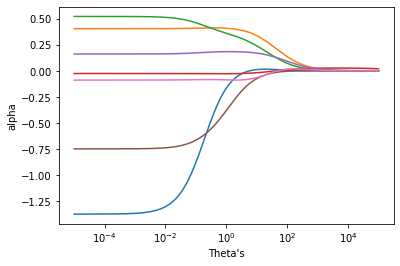

In [21]:
for i in range(7):
    plt.semilogx(alphas, w[i, :])
    plt.ylabel("alpha")
    plt.xlabel("Theta's")

plt.show()

- Plot how evolve the mean square error on train and test data through the sequence of $\alpha$ values.

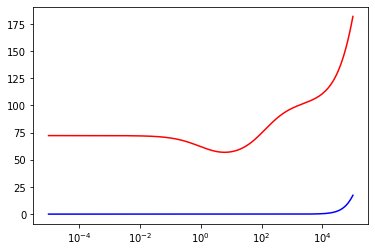

In [22]:
# Plot Mean Squared Error on train data
plt.semilogx(alphas, e[0, :], color = 'blue')
# Plot Mean Squared Error on train data
plt.semilogx(alphas, e[1, :], color = 'red')

plt.show()

- Conclude? (Which is the best value for $\alpha$)

##  ( 𝛼 ) ~ 60 the minmum cost in both Training/Testing using this alpha
## alpha did have effect on square error, but on reaching the Theta's need to reach
## Convergance State 
## Thus 
## ( 𝛼 ) ==0 it is Normal  Linear Regression
## ( 𝛼 ) parameter needs not be small for the Regularization no to be too strict..
## larger ( 𝛼 ), means the flexibility of the fit would be very stric

### Lasso regression

The ridge regression consists in finding the parameters $W$ which minimizes:
$$\frac{1}{2 \times 60}\sum_{i=1}^{60}\left(W^T x_i - y_i\right)^2 + \alpha \|W\|_1$$

- Using linear_model.Lasso and $\alpha = 0.$, check that you obtain the same $W$ as linear regression

In [23]:
from sklearn.linear_model import Lasso
from numpy import linalg as LA
model  = Lasso(alpha=0,fit_intercept = False,tol=0.1)
model.fit(X.T, Y)
A=model.coef_
print("A = ",A)
alpha=0
W = np.linalg.inv(X@X.T +alpha *LA.norm(A,1))@X@Y
print("W = ",W)

A =  [ 1.77372062e+00  3.92210761e-01 -7.13166608e-02 -1.34942318e-03
  2.10370480e-01 -5.03911871e-01 -5.31055654e-04  1.21130128e-02]
W =  [-1.37427705  0.40461954  0.52246673 -0.02499738  0.16200821 -0.74830121
 -0.08828183  0.38558413]


/var/folders/kq/4phtjsxn40794zp8lvjfsccw0000gn/T/ipykernel_72813/3360599141.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X.T, Y)
/Users/ibrahim/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


In this part, we will check the influence of $\alpha$ on the solution of the linear regression

- Train a Lasso regression with different values of $\alpha$ = np.logspace(-5, 5, 200), save the values of W, Mean squared errors on train and test data.

In [24]:
N=len(ytrain)
X = xtrain
Z=np.ones((1,len(ytrain)))
X= np.vstack((Z,X))
Y = ytrain
Y.reshape((-1,))


N1=len(Ytest)
X1 = Xtest
Z1=np.ones((1,len(Ytest)))
X1= np.vstack((Z1,X1))
Y1 = Ytest
Y1.reshape((-1,))

alphas = np.logspace(-5, 5, 200)
e=[]
w=[]
for a in alphas:
    model = Lasso(alpha=a,fit_intercept = False,tol=0.1)
    model.fit(X.T, Y)
    W=model.coef_
    etrain =1/(2*N)*sum(X.T@W -Y)**2
    etest = 1/(2*N1)*sum(X1.T@W -Y1)**2
    e.append(np.array([etrain, etest]))
    w.append(W)

e=np.array(e).T
w=np.array(w).T

- Plot how evolve each $W_i$ through the sequence of $\alpha$ values.

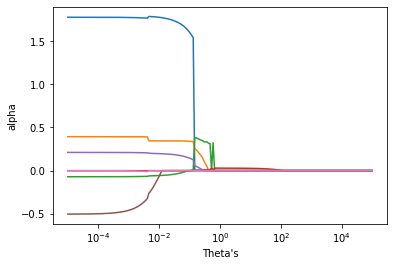

In [25]:
for i in range(7):
    plt.semilogx(alphas, w[i, :])
    plt.ylabel("alpha")
    plt.xlabel("Theta's")
plt.show()

- Plot how evolve the mean square error on train and test data through the sequence of $\alpha$ values.

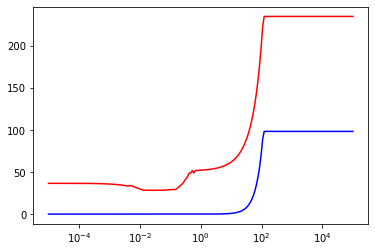

In [26]:
# Plot Mean Squared Error on train data
plt.semilogx(alphas, e[0, :], color = 'blue')
# Plot Mean Squared Error on train data
plt.semilogx(alphas, e[1, :], color = 'red')

plt.show()


- Conclude? (Which is the best value for $\alpha$

## ( 𝛼 ) ~ 40  the minmum cost in both Training/Testing using this alpha
## the higher the alpha , the most feature coefficients are zero
## when alpha is 0, Lasso regression produces the same coefficients as a linear regression. 
## So it helps us to see which feature is more important


- Compare the result with ridge solution?

# Lasso tends to do well if there are a small number of significant parameters and the others are close to zero (works when only a few predictors actually influence the response). 

# Ridge works well if there are many large parameters of about the same value (works  when most predictors impact the response).